# 앙상블 

### Bagging meta-estimator

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer #load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

```
hp = {
    "random_state" : SEED,
    "base_estimator" : base_model, #basse로 사용할 Model 
    "n_estimators": 100, # base_estimator  개수
    "max_features":0.5 # 한 모델이 사용할 최대 feature의 비율 
    "bootstrap_features": Flase, # Feature의 중복추출 허용
    "bootstrap" : True # Dataset 중복추출 허용 여부
}
```

#### KNN + Bagging

### Forests of randomized trees

- `sklearn.ensemble`
  - Random Forest
  - Extra-Trees

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [6]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()
#boston = load_boston()
diabetes = load_diabetes()

In [104]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.8)

In [105]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.0014573097229003905
avg score time: 0.0018054008483886718
avg test score: 0.96


In [106]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.024458694458007812
avg score time: 0.006630468368530274
avg test score: 0.9666666666666666


#### SVC + Bagging

In [107]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [108]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.0026998519897460938
avg score time: 0.0011523246765136718
avg test score: 0.9666666666666666


In [110]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.05917448997497558
avg score time: 0.007906627655029298
avg test score: 0.9533333333333334


#### Decision Tree + Bagging


In [111]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [112]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.002216672897338867
avg score time: 0.0007681369781494141
avg test score: 0.9533333333333334


In [113]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.03225545883178711
avg score time: 0.003974151611328125
avg test score: 0.9533333333333334


### Bagging을 사용한 회귀

In [114]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.8)

In [115]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y= diabetes.target,
    cv=5
)
print(f"avg fit time : {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time : 0.001745128631591797
avg score time: 0.0019823551177978516
avg test score: 0.3689720650295623


In [116]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.025347900390625
avg score time: 0.012608194351196289
avg test score: 0.4331927742481986


#### SVR + Bagging

In [117]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=20, max_samples=.5, max_features=.8)

In [118]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.013562393188476563
avg score time: 0.0026081562042236327
avg test score: 0.14659868748701582


In [119]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.11234440803527831
avg score time: 0.03258976936340332
avg test score: 0.061614343092620524


In [120]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [121]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.003383350372314453
avg score time: 0.0009171485900878907
avg test score: -0.1363418114387697


In [122]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.029442501068115235
avg score time: 0.0025400161743164063
avg test score: 0.36634463451795884


#### Decision Tree + Bagging

### RandomForestClassifier

```
params = {
    "random_state": SEED,
    "max_features" : "sqrt", # 몇개의 Feature로 학습 시킬지 None : 전체피쳐
    "n_estimators" : 10, # 트리 개수
    "max_depth" : 10,
    "min_samples_split" : 10,
    "min_samples_leaf" : 3,
}

```

In [4]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [7]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.1642604351043701
avg score time: 0.015267562866210938
avg test score: 0.9533333333333334


In [8]:
base_model.fit(X=iris.data, y = iris.target)
base_model["randomforestclassifier"].feature_importances_

array([0.10391442, 0.02657072, 0.43791419, 0.43160067])

In [9]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# 파이프라인 생성 (스케일러, 랜덤포레스트분류생성기) -> 밸리데이트로 스코어 찾기 -> 모델 피처의 연관성
# 찾아서 관련성 높은 피처 찾아주기 

### Random Forests Regressor


In [10]:
base_model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [11]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.242339563369751
avg score time: 0.008663797378540039
avg test score: 0.42665153206971995


In [12]:
base_model.fit(X=diabetes.data, y=diabetes.target)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [13]:
base_model["randomforestregressor"].feature_importances_

array([0.05995562, 0.01157255, 0.2666275 , 0.09280235, 0.04287647,
       0.05884769, 0.05215562, 0.02413301, 0.32045424, 0.07057496])

In [14]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
# 당뇨의 관계성은 bmi 피처가 가장 높은걸로 확인됨 

## AdaBoost
```
params = {
    'n_estimators' : [20, 22, 23, 24, 25], # 생성할 모델의 수 지정
    'learning_rate' : [0.4, 0.45, 0.5, 0.55, 0.6], # 학습률 지정
    'base_estimator__criterion' : ['gini', 'entropy'], # 트리의 학습방법 설정(엔트로피 or 지니)
    'base_estimator__max_features' : [7, 8], # 최대 피처 지정
    'base_estimator__max_depth' : [1, 2] # 부스팅 할 때 의 탐색 깊이

```

In [15]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [16]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [17]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.12990908622741698
avg score time: 0.010257577896118164
avg test score: 0.9466666666666667


### AdaBoost 회귀

In [18]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [19]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print(f"avg fit time : {cross_val['fit_time'].mean()}")
print(f"avg score time : {cross_val['score_time'].mean()}")
print(f"avg test scroe : {cross_val['test_score'].mean()}")

avg fit time : 0.07712621688842773
avg score time : 0.004438352584838867
avg test scroe : 0.40889151378832267


### GradientBoostingClassifier

```
params = {"loss"='deviance', # ‘{‘log_loss’, ‘deviance’, ‘exponential’}, default=’log_loss’ 손실 함수값
            "criterion" : 'squared_error', # {‘friedman_mse’, ‘squared_error’}, 개별 트리의 불순도 측정 함수
            "n_estimators" : '3', # 반복수 또는 base_estimator 개수
            "min_samples_leaf" : '5', # 개별 트리 최소 끝마디 샘플 수
            "max_depth" : '3', # 개별트리 최대 깊이
            "learning_rate" : '1', # 스텝 사이즈
            "subsample" : '0.8',
            "random_state" : '100'
            }
```

In [20]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [21]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [22]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.2664204120635986
avg score time: 0.0009288311004638672
avg test score: 0.9666666666666668


### Gradient Tree Boosting 회귀

In [23]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [24]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.09713754653930665
avg score time: 0.0007496356964111328
avg test score: 0.40955425179641286


### Extreme Gradient Boosting

```
params_xg = {
        'n_estimators': [750,1000,1250,1500,2000], # 생성할 모델의 수 지정
        'max_depth':[7,15,20], # 부스팅시 탐색 깊이
        'min_child_weight': [3, 10], # 관측치에 대한 가중치 합의 최소
        'gamma': [0.5,2, 5], #  감마 설정이 클수록 더 보수적인 알고리즘이 생성됩니다.
        'subsample': [0.6, 0.8], # 학습시킬 sample 의 비중
        'colsample_bytree': [0.7, 1.0]
        }

```

In [25]:
from xgboost import XGBClassifier

In [26]:
model = make_pipeline(
    StandardScaler(),
    XGBClassifier()
)

In [27]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.174041748046875
avg score time: 0.005582094192504883
avg test score: 0.96


## 투표 기반 분류 (Voting Classifier)

- 서로 다른 모델들의 결과를 투표를 통해 결합
- 두가지 방법으로 투표 가능
  - 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  - 예측된 확률의 가중치 평균 (soft voting)

In [28]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [58]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [59]:
model1_name = str(type(model1)).split('.')[-1][0:3]
model2_name = str(type(model2)).split('.')[-1][:-2]
model3_name = str(type(model3)).split('.')[-1][:-2]
vote_model_name = str(type(vote_model)).split('.')[-1][:-2]

In [60]:
scores_1 = cross_val_score(model1, iris.data, iris.target, cv=5)
scores_2 = cross_val_score(model2, iris.data, iris.target, cv=5)
scores_3 = cross_val_score(model3, iris.data, iris.target, cv=5)
scores_v = cross_val_score(vote_model, iris.data, iris.target, cv=5)

In [70]:
print(f"Accuracy: {scores_1.mean()} (+/- {scores_1.std()}) [{model1_name}]")
print(f"Accuracy: {scores_2.mean()} (+/- {scores_2.std()}) [{model2_name}]")
print(f"Accuracy: {scores_3.mean()} (+/- {scores_3.std()}) [{model3_name}]")
print(f"Accuracy: {scores_v.mean()} (+/- {scores_v.std()}) [{vote_model_name}]")

Accuracy: 0.9666666666666666 (+/- 0.02108185106778919) [SVC]
Accuracy: 0.9533333333333334 (+/- 0.02666666666666666) [GaussianNB]
Accuracy: 0.9666666666666668 (+/- 0.02108185106778919) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.024944382578492935) [VotingClassifier]


### 결정 경계 시각화

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product
import numpy as np
import matplotlib.pyplot as plt

In [73]:
x = iris.data[:, [0, 2]]
y = iris.target

In [74]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                                          voting='soft', weights=[2,1,2])
model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

In [75]:
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

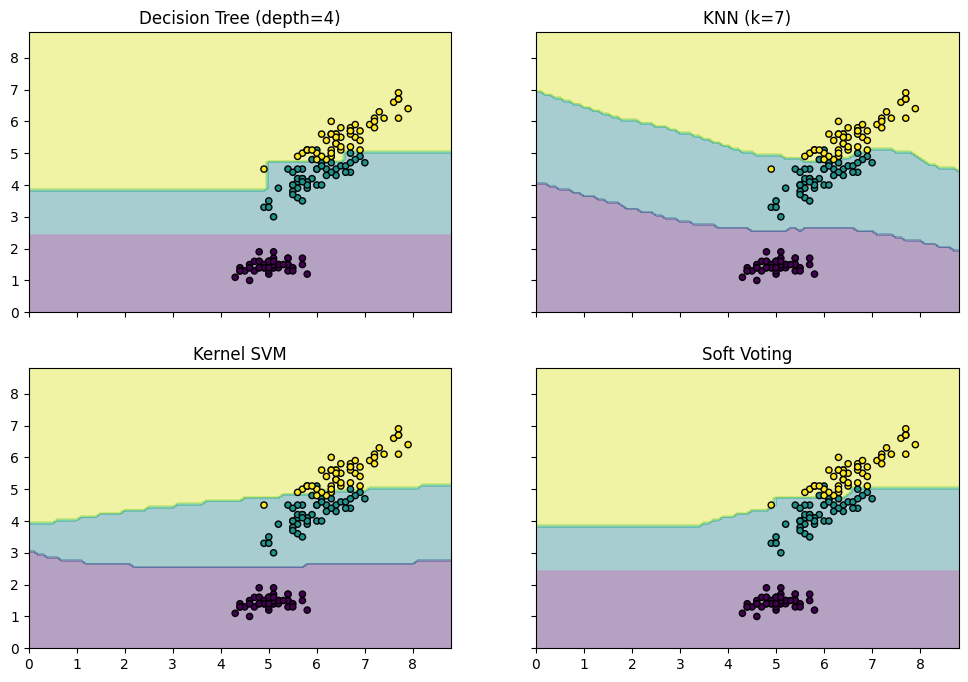

In [76]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           "Kernel SVM", 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [79]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1])

In [80]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, diabetes.data, diabetes.target, cv=5)
  print("R2: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2: 0.48 (+/- 0.05) [LinearRegression]
R2: 0.41 (+/- 0.07) [GradientBoostingRegressor]
R2: 0.41 (+/- 0.05) [RandomForestRegressor]
R2: 0.46 (+/- 0.05) [VotingRegressor]


### 회귀식 시각화

In [81]:
x = diabetes.data[:, 0].reshape(-1, 1)
y = diabetes.target

In [82]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
vote_model = vote_model.fit(x, y)

In [83]:
x_min, x_max = x.min()-1, x.max() + 1
xx= np.arange(x_min-1, x_max+1, .1)

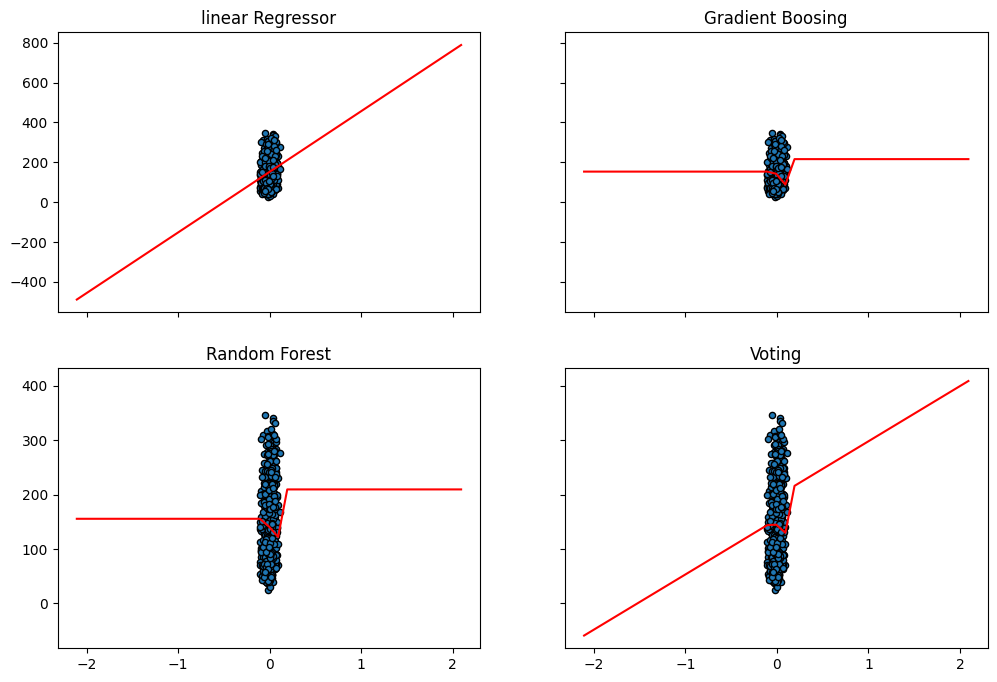

In [84]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['linear Regressor', 'Gradient Boosing', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

- 각 모델의 예측 값을 최종 모델의 입력으로 사용
- 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [85]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [86]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [87]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [88]:
cross_val = cross_validate(
    estimator = reg,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.1285398006439209
avg score time: 0.0027443885803222655
avg test score: 0.37100587598433005


#### 회귀식 시각화

In [91]:
x = diabetes.data[:, 0].reshape(-1, 1)
y = diabetes.target

In [92]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
reg = reg.fit(x, y)

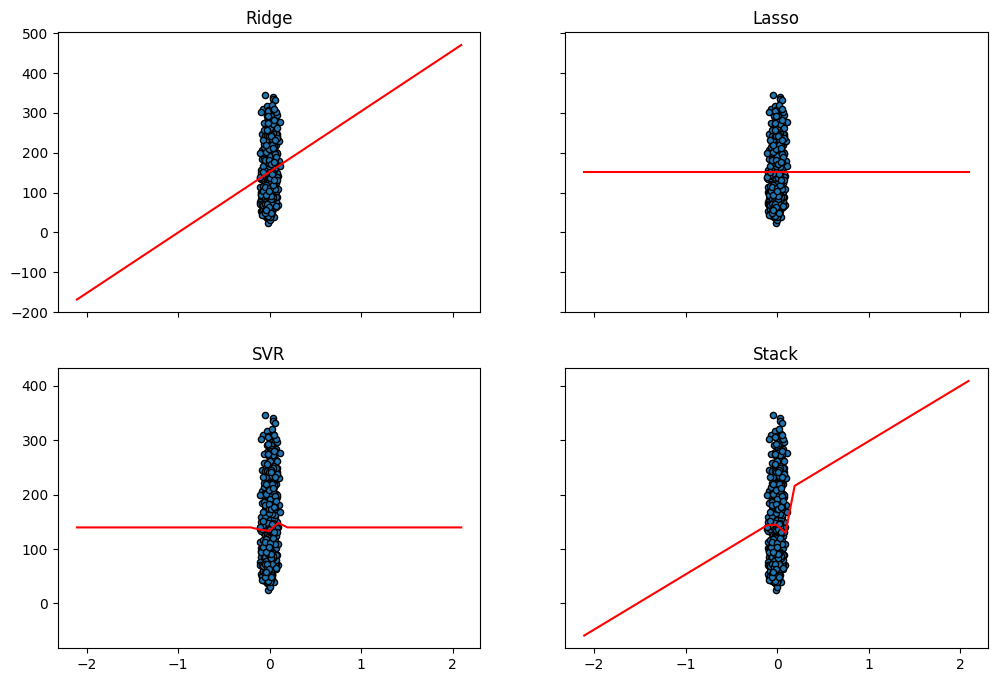

In [93]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(x, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [95]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('navie', GaussianNB())]

In [97]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier())

In [98]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5
)
print(f"avg fit time: {cross_val['fit_time'].mean()}")
print(f"avg score time: {cross_val['score_time'].mean()}")
print(f"avg test score: {cross_val['test_score'].mean()}")

avg fit time: 0.2849559307098389
avg score time: 0.011454296112060548
avg test score: 0.9666666666666666


#### 결정 경계 시각화

In [100]:
x = iris.data[:, [0, 2]]
y = iris.target

In [101]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(x, y)
model2 = model2.fit(x, y)
model3 = model3.fit(x, y)
stack = stack.fit(x, y)

In [102]:
x_min, x_max = x.min()-1, x.max() + 1
y_min, y_max = x.min()-1, x.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

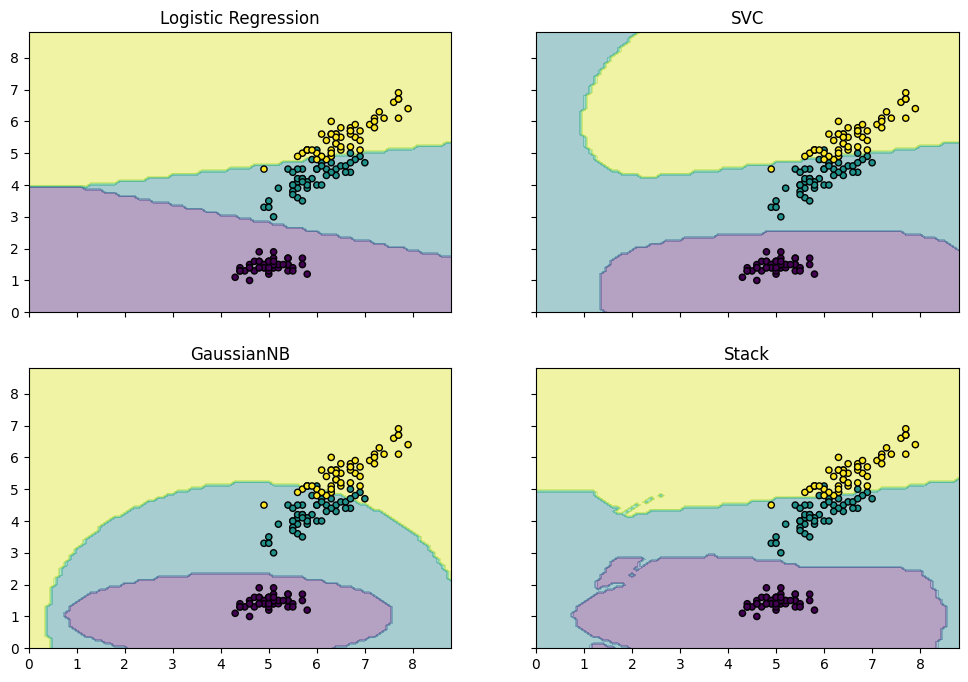

In [103]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', "GaussianNB", 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

- 시각화나 데이터 분석을 할 때 분류/회귀인지 구분하고 적절한 estimator 사용해서 최선의 모델을 찾아야
하는게 중요한데 지금 어느때 적절한 모델을 써야하는지 잘 이해가 가지않는다 . 
그래도 많은 모델을 사용해 봤으니 계속 사용하면 적응될지도..
